#EDA da amostra - Metodologia Ciêntifica

O objetivo principal desse notebook é fazer a analise exploratória dos dados coletados na survey, de forma que as informações possam ser usadas na escrita do artigo.

#Imports e carregamento dos dados

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly as ply
import numpy as np

In [51]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Base de dados/base_de_dados.xlsx")

In [52]:
df.head()

,Carimbo de data/hora,Qual seu gênero?,Qual sua faixa etária?,"Atualmente, qual área você estuda ou trabalha?","Durante sua infância, quanto tempo você costumava dedicar semanalmente a videogames, em média?","Durante sua adolescência, quanto tempo você costumava dedicar semanalmente a videogames, em média?",Quais desses tipos de jogos digitais você mais teve o costume de jogar?,"Na sua opinião, você acredita que os jogos que jogava tiveram influência na escolha de sua profissão?"
0,2023-04-25 15:05:12.941,Masculino,20 aos 29 anos,Tecnologia e Informática,Muito frequentemente (5 ou mais vezes por semana),Nunca tive o costume de jogar na adolescência,Ação e Aventura,Discordo parcialmente
1,2023-05-10 21:24:41.727,Masculino,20 aos 29 anos,Tecnologia e Informática,Muito frequentemente (5 ou mais vezes por semana),Muito frequentemente (5 ou mais vezes por semana),"Ação e Aventura (Zelda, Mario, Sonic), Esporte...",Concordo parcialmente
2,2023-05-10 21:25:33.830,Feminino,20 aos 29 anos,Serviços Públicos e Sociais,Às vezes (1-2 vezes por semana),Frequentemente (3-4 vezes por semana),"Ação e Aventura (Zelda, Mario, Sonic), Simulaç...",Discordo completamente
3,2023-05-10 21:27:34.428,Feminino,20 aos 29 anos,"Tecnologia e Informática, Ciência e Engenharia",Raramente (menos de uma vez por semana),Às vezes (1-2 vezes por semana),"Ação e Aventura (Zelda, Mario, Sonic), Simulaç...",Neutro
4,2023-05-10 21:27:47.847,Masculino,20 aos 29 anos,Tecnologia e Informática,Muito frequentemente (5 ou mais vezes por semana),Nunca tive o costume de jogar na adolescência,"Ação e Aventura (Zelda, Mario, Sonic), RPG (Sk...",Concordo parcialmente


##Limpeza

In [53]:
df.rename(columns={'Qual seu gênero?':'genero', 'Qual sua faixa etária?':'idade', 'Atualmente, qual área você estuda ou trabalha?':'area',
                  'Durante sua infância, quanto tempo você costumava dedicar semanalmente a videogames, em média?': 'temp/jogo infancia',
                  'Durante sua adolescência, quanto tempo você costumava dedicar semanalmente a videogames, em média?': 'temp/jogo adolescencia',
                  'Quais desses tipos de jogos digitais você mais teve o costume de jogar?': 'tipo de jogo',
                  'Na sua opinião, você acredita que os jogos que jogava tiveram influência na escolha de sua profissão?':'influencia',
                  }, inplace=True)
df.drop(columns=['Carimbo de data/hora'], inplace=True)
df.head()

,genero,idade,area,temp/jogo infancia,temp/jogo adolescencia,tipo de jogo,influencia
0,Masculino,20 aos 29 anos,Tecnologia e Informática,Muito frequentemente (5 ou mais vezes por semana),Nunca tive o costume de jogar na adolescência,Ação e Aventura,Discordo parcialmente
1,Masculino,20 aos 29 anos,Tecnologia e Informática,Muito frequentemente (5 ou mais vezes por semana),Muito frequentemente (5 ou mais vezes por semana),"Ação e Aventura (Zelda, Mario, Sonic), Esporte...",Concordo parcialmente
2,Feminino,20 aos 29 anos,Serviços Públicos e Sociais,Às vezes (1-2 vezes por semana),Frequentemente (3-4 vezes por semana),"Ação e Aventura (Zelda, Mario, Sonic), Simulaç...",Discordo completamente
3,Feminino,20 aos 29 anos,"Tecnologia e Informática, Ciência e Engenharia",Raramente (menos de uma vez por semana),Às vezes (1-2 vezes por semana),"Ação e Aventura (Zelda, Mario, Sonic), Simulaç...",Neutro
4,Masculino,20 aos 29 anos,Tecnologia e Informática,Muito frequentemente (5 ou mais vezes por semana),Nunca tive o costume de jogar na adolescência,"Ação e Aventura (Zelda, Mario, Sonic), RPG (Sk...",Concordo parcialmente


In [54]:
df['tipo de jogo'].unique()

array(['Ação e Aventura',
       'Ação e Aventura (Zelda, Mario, Sonic), Esportes (Fifa, NBA, Tênis), Simulação (The Sims, Sim City), Estratégia e Lógica (Civilization, Age of Empires, Tetris, RPG (Skyrim, Diablo), Corrida (Need For Speed, Mario Kart)',
       'Ação e Aventura (Zelda, Mario, Sonic), Simulação (The Sims, Sim City), RPG (Skyrim, Diablo), Corrida (Need For Speed, Mario Kart)',
       'Ação e Aventura (Zelda, Mario, Sonic), Simulação (The Sims, Sim City)',
       'Ação e Aventura (Zelda, Mario, Sonic), RPG (Skyrim, Diablo)',
       'Ação e Aventura (Zelda, Mario, Sonic), Esportes (Fifa, NBA, Tênis), Estratégia e Lógica (Civilization, Age of Empires, Tetris, Corrida (Need For Speed, Mario Kart)',
       'Ação e Aventura (Zelda, Mario, Sonic), Simulação (The Sims, Sim City), Estratégia e Lógica (Civilization, Age of Empires, Tetris, RPG (Skyrim, Diablo), Corrida (Need For Speed, Mario Kart)',
       'Ação e Aventura (Zelda, Mario, Sonic)',
       'Ação e Aventura (Zelda, Mar

In [55]:
df['area'].unique()

array(['Tecnologia e Informática', 'Serviços Públicos e Sociais',
       'Tecnologia e Informática, Ciência e Engenharia',
       'Outros (Direito)', 'Educação, Ciência e Engenharia',
       'Educação, Artes e Cultura', 'Saúde',
       'Tecnologia e Informática, Artes e Cultura',
       'Ciência e Engenharia',
       'Saúde, Outros estudo tudo (faço cursinho, mas quero cursar psicologia)',
       'Saúde, Educação', 'Educação', 'Outros (Cursinho)',
       'Negócios e Finanças', 'Negócios e Finanças, Educação',
       'Artes e Cultura', 'Tecnologia e Informática, Negócios e Finanças',
       'Saúde, Artes e Cultura',
       'Tecnologia e Informática, Negócios e Finanças, Outros (Gastronomia)'],
      dtype=object)

In [56]:
def exclui_exemplo_jogo(string):
  exemplos = [' (Zelda, Mario, Sonic)', ' (Zelda, Mario, Counter-Strike, Valorant)', ' (Fifa, NBA, Tênis)', ' (The Sims, Sim City)',
              ' (Civilization, Age of Empires, Tetris)', ' (Skyrim, Diablo)', ' (Need For Speed, Mario Kart)', ' (Civilization, Age of Empires, Tetris)',
              ' (Civilization, Age of Empires, Tetris', ' (Barbie) ']
  for exemplo in exemplos:
    string = string.replace(exemplo, '')

  return string

def exclui_exemplo_area(string):
  exemplos = [' (Direito)', ' estudo tudo (faço cursinho, mas quero cursar psicologia)', ' (Cursinho)', ' (Gastronomia)']
  for exemplo in exemplos:
    string = string.replace(exemplo, '')

  return string

In [57]:
df['tipo de jogo'] = df['tipo de jogo'].apply(lambda row : exclui_exemplo_jogo(row))
df['area'] = df['area'].apply(lambda row : exclui_exemplo_area(row))

In [58]:
df['tipo de jogo'].unique()

array(['Ação e Aventura',
       'Ação e Aventura, Esportes, Simulação, Estratégia e Lógica, RPG, Corrida',
       'Ação e Aventura, Simulação, RPG, Corrida',
       'Ação e Aventura, Simulação', 'Ação e Aventura, RPG',
       'Ação e Aventura, Esportes, Estratégia e Lógica, Corrida',
       'Ação e Aventura, Simulação, Estratégia e Lógica, RPG, Corrida',
       'Ação e Aventura, Simulação, Estratégia e Lógica, Corrida',
       'Ação e Aventura, RPG, Corrida', 'RPG, Corrida, Ação e Aventura',
       'Ação e Aventura, Esportes, Estratégia e Lógica, RPG, Corrida',
       'Esportes, Ação e Aventura',
       'Ação e Aventura, Simulação, Estratégia e Lógica, RPG',
       'Ação e Aventura, Estratégia e Lógica, RPG, Outros',
       'Ação e Aventura, Corrida', 'Nenhum',
       'Ação e Aventura, RPG, Outros',
       'Ação e Aventura, Simulação, Corrida, Outros',
       'Ação e Aventura, Esportes, Simulação, Corrida',
       'Ação e Aventura, Esportes',
       'Ação e Aventura, Esportes, Simulaç

In [59]:
df['area'].unique()

array(['Tecnologia e Informática', 'Serviços Públicos e Sociais',
       'Tecnologia e Informática, Ciência e Engenharia', 'Outros',
       'Educação, Ciência e Engenharia', 'Educação, Artes e Cultura',
       'Saúde', 'Tecnologia e Informática, Artes e Cultura',
       'Ciência e Engenharia', 'Saúde, Outros', 'Saúde, Educação',
       'Educação', 'Negócios e Finanças', 'Negócios e Finanças, Educação',
       'Artes e Cultura', 'Tecnologia e Informática, Negócios e Finanças',
       'Saúde, Artes e Cultura',
       'Tecnologia e Informática, Negócios e Finanças, Outros'],
      dtype=object)

##Tipos de jogos mais jogados

In [60]:
valores_col = []
for _, row in df.iterrows():
  for tipo in row['tipo de jogo'].split(','):
    valores_col.append(tipo.strip())

df_tipo_jogo = pd.DataFrame({'tipo de jogo': valores_col})
df_tipo_jogo.head()

,tipo de jogo
0,Ação e Aventura
1,Ação e Aventura
2,Esportes
3,Simulação
4,Estratégia e Lógica


In [61]:
df_tipo_jogo.shape

(428, 1)

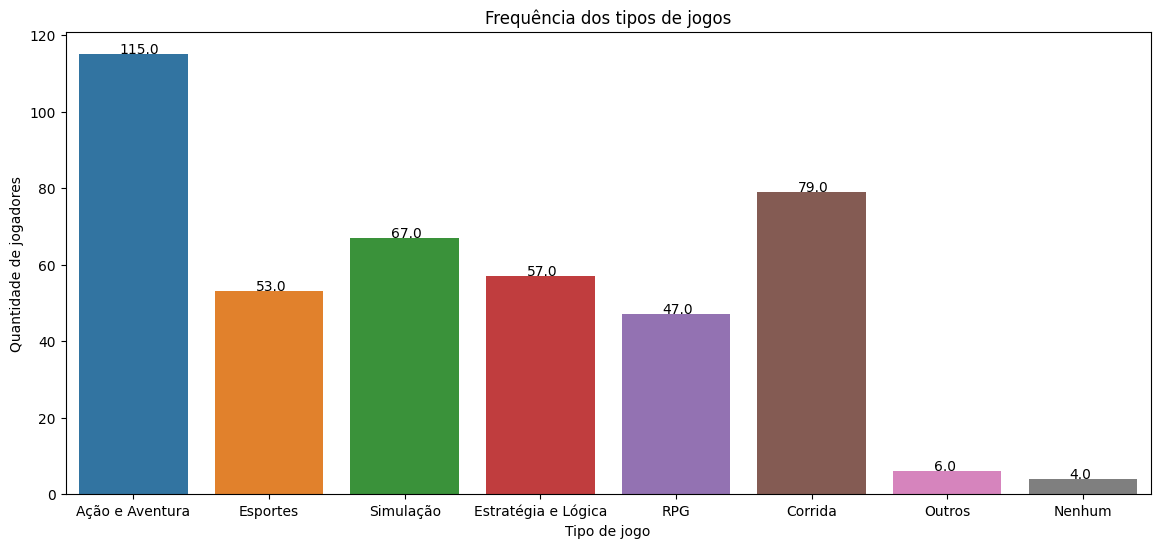

In [62]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(x='tipo de jogo', data=df_tipo_jogo)
ax.set(xlabel='Tipo de jogo', ylabel='Quantidade de jogadores')
ax.set_title("Frequência dos tipos de jogos")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.30, p.get_height()+0.2))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/frequencia_jogos.png', bbox_inches='tight')
plt.show()

#Frequência das áreas de trabalho/estudo nas respostas da survey

In [63]:
valores_col_area = []
for _, row in df.iterrows():
  for area in row['area'].split(','):
    valores_col_area.append(area.strip())

df_area = pd.DataFrame({'area': valores_col_area})
df_area.head()

,area
0,Tecnologia e Informática
1,Tecnologia e Informática
2,Serviços Públicos e Sociais
3,Tecnologia e Informática
4,Ciência e Engenharia


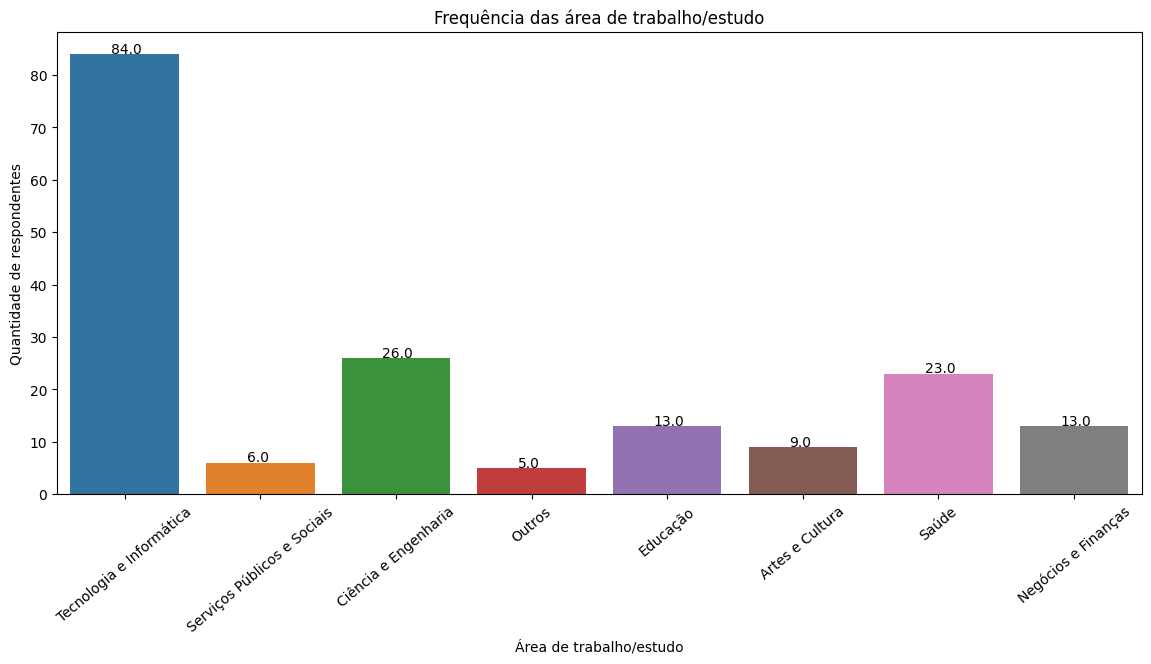

In [94]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(x='area', data=df_area)
ax.set(xlabel='Área de trabalho/estudo', ylabel='Quantidade de respondentes')
ax.set_title("Frequência das área de trabalho/estudo")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.30, p.get_height()+0.2))
plt.xticks(rotation=40)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/frequencia_area.png', bbox_inches='tight')
plt.show()

#Tipo de jogo relacionado a área de trabalho/estudo

In [65]:
valores_col_jogo = []
valores_col_area = []
for _, row in df.iterrows():
  for area in row['area'].split(','):
    for jogo in row['tipo de jogo'].split(','):
      valores_col_area.append(area.strip())
      valores_col_jogo.append(jogo.strip())

df2 = pd.DataFrame({'tipo de jogo': valores_col_jogo, 'area': valores_col_area})
df2.head()

,tipo de jogo,area
0,Ação e Aventura,Tecnologia e Informática
1,Ação e Aventura,Tecnologia e Informática
2,Esportes,Tecnologia e Informática
3,Simulação,Tecnologia e Informática
4,Estratégia e Lógica,Tecnologia e Informática


In [66]:
rel_jogo_area = df2.groupby(['tipo de jogo', 'area']).area.agg([len])
rel_jogo_area = rel_jogo_area.reset_index()
rel_jogo_area.head()

,tipo de jogo,area,len
0,Ação e Aventura,Artes e Cultura,9
1,Ação e Aventura,Ciência e Engenharia,19
2,Ação e Aventura,Educação,8
3,Ação e Aventura,Negócios e Finanças,6
4,Ação e Aventura,Outros,3


In [67]:
hue_order = ['Outros', 'Serviços Públicos e Sociais', 'Negócios e Finanças', 'Educação', 'Artes e Cultura',
             'Saúde', 'Ciência e Engenharia', 'Tecnologia e Informática']

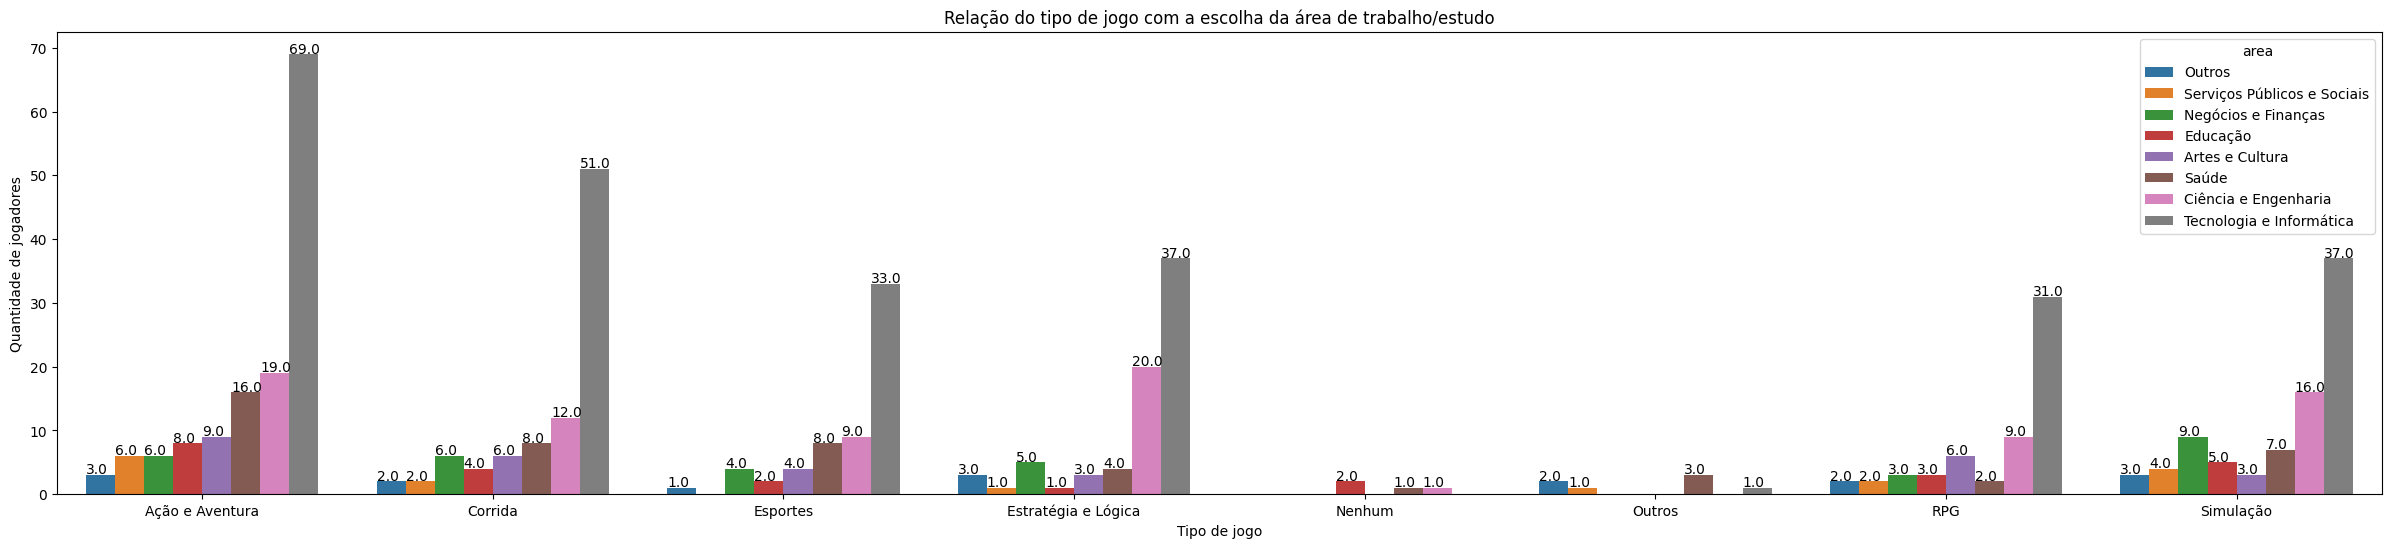

In [68]:
plt.figure(figsize=(30, 6))
ax = sns.barplot(x='tipo de jogo', y='len', hue='area', hue_order=hue_order, data=rel_jogo_area)
ax.set(xlabel='Tipo de jogo', ylabel='Quantidade de jogadores')
ax.set_title("Relação do tipo de jogo com a escolha da área de trabalho/estudo")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/relacao_jogo_area2.png', bbox_inches='tight')
plt.show()

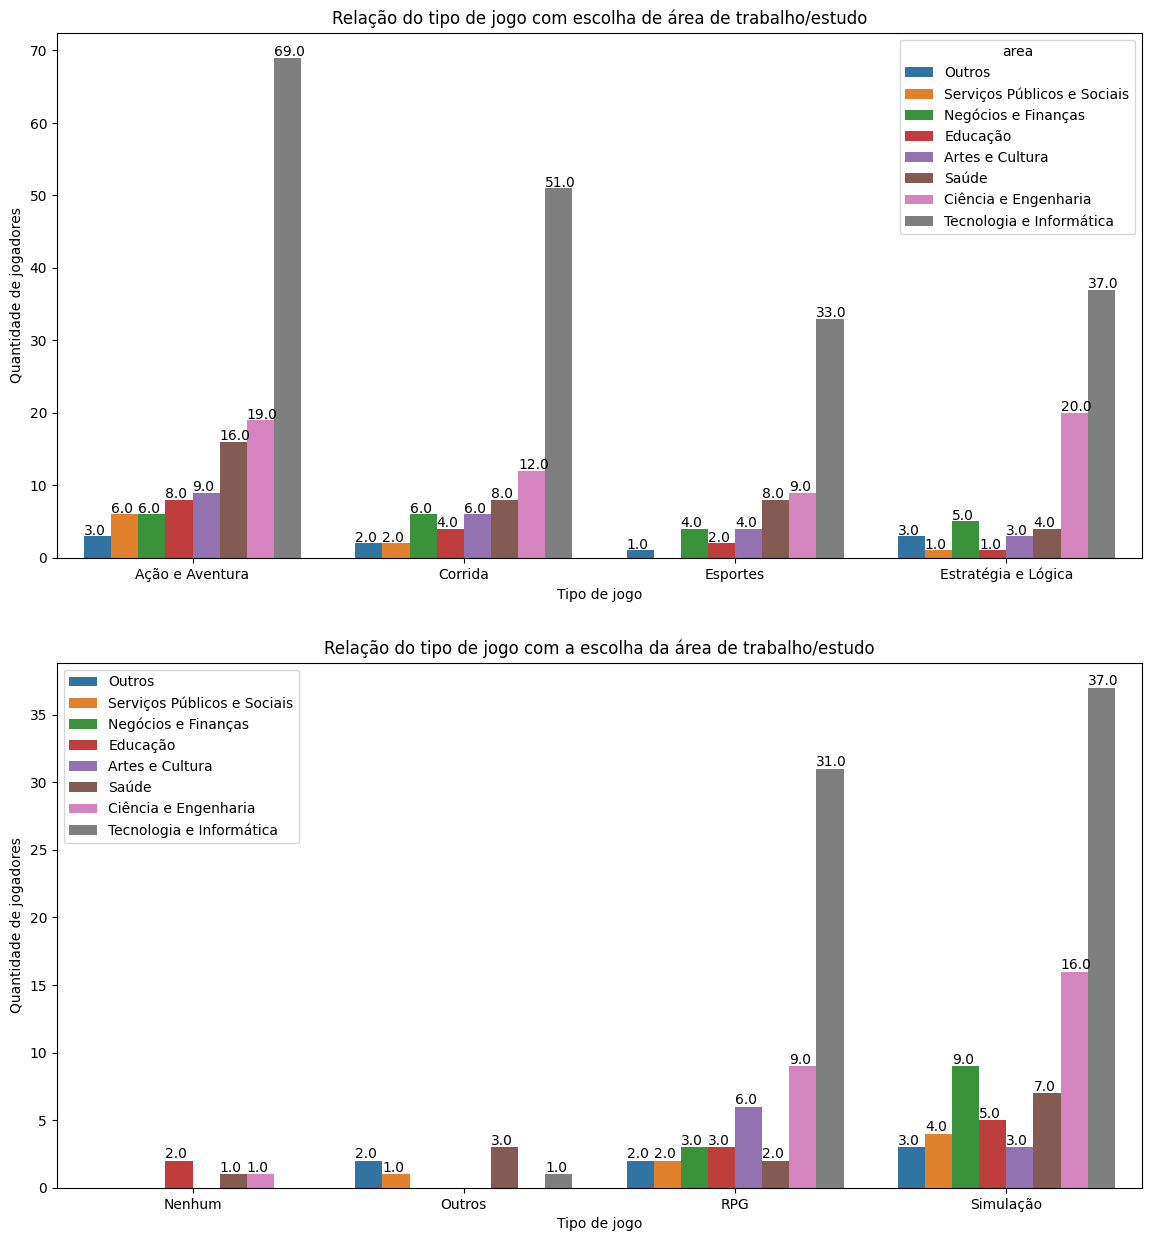

In [69]:
plt.figure(figsize=(14, 15))
plt.subplot(2, 1, 1)
ax = sns.barplot(x='tipo de jogo', y='len', hue='area', hue_order=hue_order, data=rel_jogo_area[:31])
ax.set(xlabel='Tipo de jogo', ylabel='Quantidade de jogadores')
ax.set_title("Relação do tipo de jogo com escolha de área de trabalho/estudo")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))

plt.subplot(2, 1, 2)
ax = sns.barplot(x='tipo de jogo', y='len', hue='area', hue_order=hue_order, data=rel_jogo_area[31:])
plt.legend(loc='upper left')
ax.set(xlabel='Tipo de jogo', ylabel='Quantidade de jogadores')
ax.set_title("Relação do tipo de jogo com a escolha da área de trabalho/estudo")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/relacao_jogo_area.png', bbox_inches='tight')
plt.show()

## Tempo de jogo relacionado a escolha da área de trabalho/estudo

In [70]:
df['temp/jogo infancia'].unique()

array(['Muito frequentemente (5 ou mais vezes por semana)',
       'Às vezes (1-2 vezes por semana)',
       'Raramente (menos de uma vez por semana)',
       'Frequentemente (3-4 vezes por semana)',
       'Nunca tive o costume de jogar na infância'], dtype=object)

In [71]:
valores_col_temp_inf = []
valores_col_temp_adl = []
valores_col_area = []
for _, row in df.iterrows():
  for area in row['area'].split(','):
    valores_col_area.append(area.strip())
    valores_col_temp_inf.append(row['temp/jogo infancia'])
    valores_col_temp_adl.append(row['temp/jogo adolescencia'])

df3 = pd.DataFrame({'temp/jogo infancia': valores_col_temp_inf, 'temp/jogo adolescencia': valores_col_temp_adl, 'area': valores_col_area})
df3.head()

,temp/jogo infancia,temp/jogo adolescencia,area
0,Muito frequentemente (5 ou mais vezes por semana),Nunca tive o costume de jogar na adolescência,Tecnologia e Informática
1,Muito frequentemente (5 ou mais vezes por semana),Muito frequentemente (5 ou mais vezes por semana),Tecnologia e Informática
2,Às vezes (1-2 vezes por semana),Frequentemente (3-4 vezes por semana),Serviços Públicos e Sociais
3,Raramente (menos de uma vez por semana),Às vezes (1-2 vezes por semana),Tecnologia e Informática
4,Raramente (menos de uma vez por semana),Às vezes (1-2 vezes por semana),Ciência e Engenharia


In [72]:
rel_temp_inf_area = df3.groupby(['temp/jogo infancia', 'area']).area.agg([len])
rel_temp_inf_area = rel_temp_inf_area.reset_index()
rel_temp_inf_area.head()

,temp/jogo infancia,area,len
0,Frequentemente (3-4 vezes por semana),Artes e Cultura,2
1,Frequentemente (3-4 vezes por semana),Ciência e Engenharia,10
2,Frequentemente (3-4 vezes por semana),Educação,2
3,Frequentemente (3-4 vezes por semana),Negócios e Finanças,2
4,Frequentemente (3-4 vezes por semana),Outros,2


In [73]:
rel_temp_inf_area.loc[rel_temp_inf_area['temp/jogo infancia'] == 'Nunca tive o costume de jogar na infância', ['ordem']] = 0
rel_temp_inf_area.loc[rel_temp_inf_area['temp/jogo infancia'] == 'Raramente (menos de uma vez por semana)', ['ordem']] = 1
rel_temp_inf_area.loc[rel_temp_inf_area['temp/jogo infancia'] == 'Às vezes (1-2 vezes por semana)', ['ordem']] = 2
rel_temp_inf_area.loc[rel_temp_inf_area['temp/jogo infancia'] == 'Frequentemente (3-4 vezes por semana)', ['ordem']] = 3
rel_temp_inf_area.loc[rel_temp_inf_area['temp/jogo infancia'] == 'Muito frequentemente (5 ou mais vezes por semana)', ['ordem']] = 4
rel_temp_inf_area.sort_values(by='ordem', inplace = True)
rel_temp_inf_area.head()

,temp/jogo infancia,area,len,ordem
18,Nunca tive o costume de jogar na infância,Negócios e Finanças,1,0.0
16,Nunca tive o costume de jogar na infância,Ciência e Engenharia,1,0.0
20,Nunca tive o costume de jogar na infância,Serviços Públicos e Sociais,1,0.0
21,Nunca tive o costume de jogar na infância,Tecnologia e Informática,4,0.0
17,Nunca tive o costume de jogar na infância,Educação,3,0.0


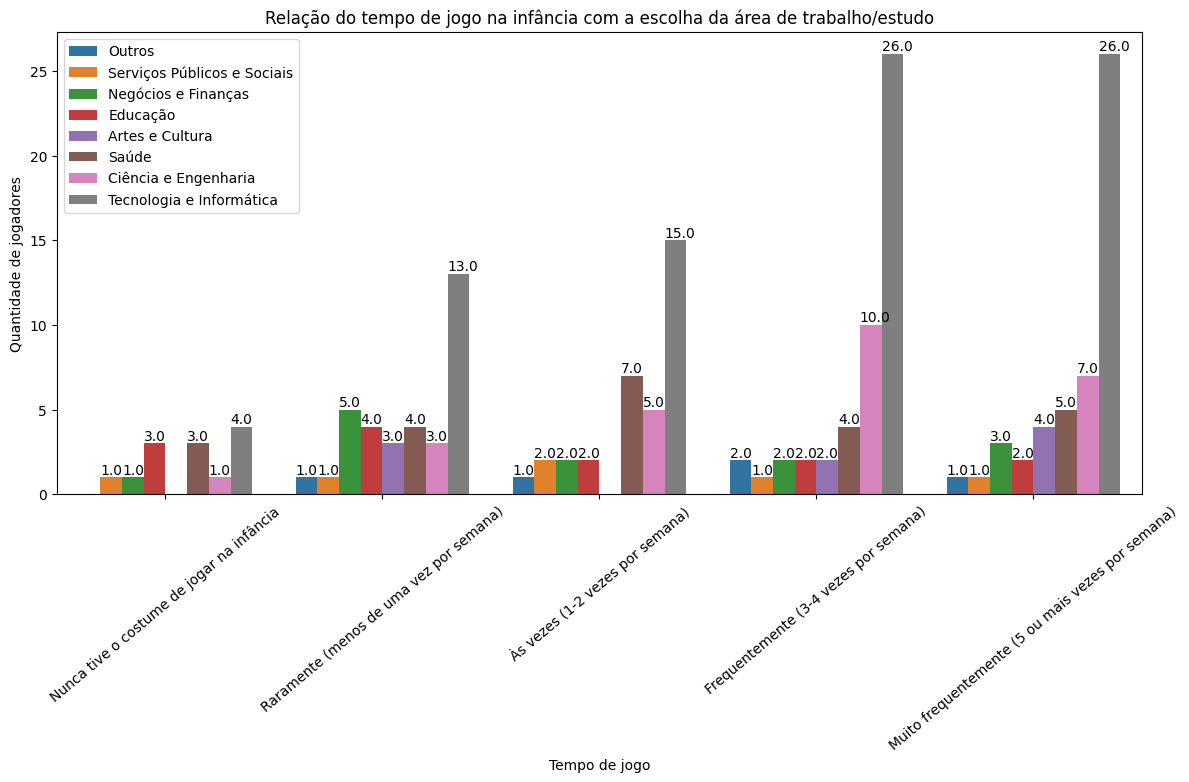

In [74]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='temp/jogo infancia', y='len', hue='area', hue_order=hue_order, data=rel_temp_inf_area)
ax.set(xlabel='Tempo de jogo', ylabel='Quantidade de jogadores')
ax.set_title("Relação do tempo de jogo na infância com a escolha da área de trabalho/estudo")
plt.legend(loc='upper left')
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))
plt.xticks(rotation=40)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/rel_temp_inf_area.png', bbox_inches='tight')
plt.show()

In [75]:
rel_temp_adl_area = df3.groupby(['temp/jogo adolescencia', 'area']).area.agg([len])
rel_temp_adl_area = rel_temp_adl_area.reset_index()
rel_temp_adl_area.head()

,temp/jogo adolescencia,area,len
0,Frequentemente (3-4 vezes por semana),Artes e Cultura,2
1,Frequentemente (3-4 vezes por semana),Ciência e Engenharia,5
2,Frequentemente (3-4 vezes por semana),Educação,1
3,Frequentemente (3-4 vezes por semana),Negócios e Finanças,1
4,Frequentemente (3-4 vezes por semana),Outros,3


In [76]:
rel_temp_adl_area.loc[rel_temp_adl_area['temp/jogo adolescencia'] == 'Nunca tive o costume de jogar na adolescência', ['ordem']] = 0
rel_temp_adl_area.loc[rel_temp_adl_area['temp/jogo adolescencia'] == 'Raramente (menos de uma vez por semana)', ['ordem']] = 1
rel_temp_adl_area.loc[rel_temp_adl_area['temp/jogo adolescencia'] == 'Às vezes (1-2 vezes por semana)', ['ordem']] = 2
rel_temp_adl_area.loc[rel_temp_adl_area['temp/jogo adolescencia'] == 'Frequentemente (3-4 vezes por semana)', ['ordem']] = 3
rel_temp_adl_area.loc[rel_temp_adl_area['temp/jogo adolescencia'] == 'Muito frequentemente (5 ou mais vezes por semana)', ['ordem']] = 4
rel_temp_adl_area.sort_values(by='ordem', inplace = True)
rel_temp_adl_area.head()

,temp/jogo adolescencia,area,len,ordem
17,Nunca tive o costume de jogar na adolescência,Negócios e Finanças,3,0.0
20,Nunca tive o costume de jogar na adolescência,Tecnologia e Informática,6,0.0
16,Nunca tive o costume de jogar na adolescência,Educação,5,0.0
15,Nunca tive o costume de jogar na adolescência,Ciência e Engenharia,1,0.0
14,Nunca tive o costume de jogar na adolescência,Artes e Cultura,1,0.0


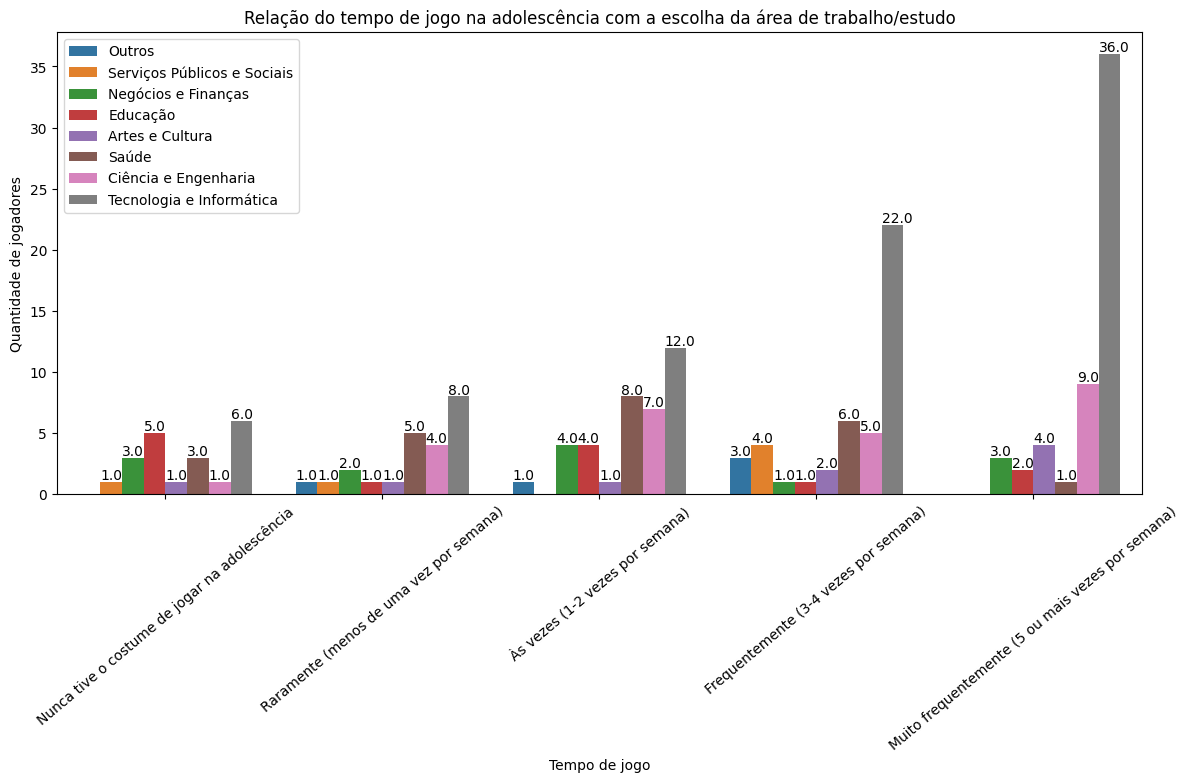

In [77]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='temp/jogo adolescencia', y='len', hue='area', hue_order=hue_order, data=rel_temp_adl_area)
ax.set(xlabel='Tempo de jogo', ylabel='Quantidade de jogadores')
ax.set_title("Relação do tempo de jogo na adolescência com a escolha da área de trabalho/estudo")
plt.legend(loc='upper left')
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))
plt.xticks(rotation=40)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/rel_temp_adl_area.png', bbox_inches='tight')
plt.show()

##Idade relacionada a escolha da área de trabalho/estudo

In [78]:
df['idade'].unique()

array(['20 aos 29 anos', '16 aos 19 anos', '30 aos 59 anos'], dtype=object)

In [79]:
valores_col_idade = []
valores_col_area = []
for _, row in df.iterrows():
  for area in row['area'].split(','):
    valores_col_area.append(area.strip())
    valores_col_idade.append(row['idade'])

df4 = pd.DataFrame({'idade': valores_col_idade, 'area': valores_col_area})
df4.head()

,idade,area
0,20 aos 29 anos,Tecnologia e Informática
1,20 aos 29 anos,Tecnologia e Informática
2,20 aos 29 anos,Serviços Públicos e Sociais
3,20 aos 29 anos,Tecnologia e Informática
4,20 aos 29 anos,Ciência e Engenharia


In [80]:
rel_idade_area = df4.groupby(['idade', 'area']).area.agg([len])
rel_idade_area = rel_idade_area.reset_index()
rel_idade_area.head()

,idade,area,len
0,16 aos 19 anos,Ciência e Engenharia,1
1,16 aos 19 anos,Educação,3
2,16 aos 19 anos,Outros,2
3,16 aos 19 anos,Saúde,4
4,16 aos 19 anos,Tecnologia e Informática,7


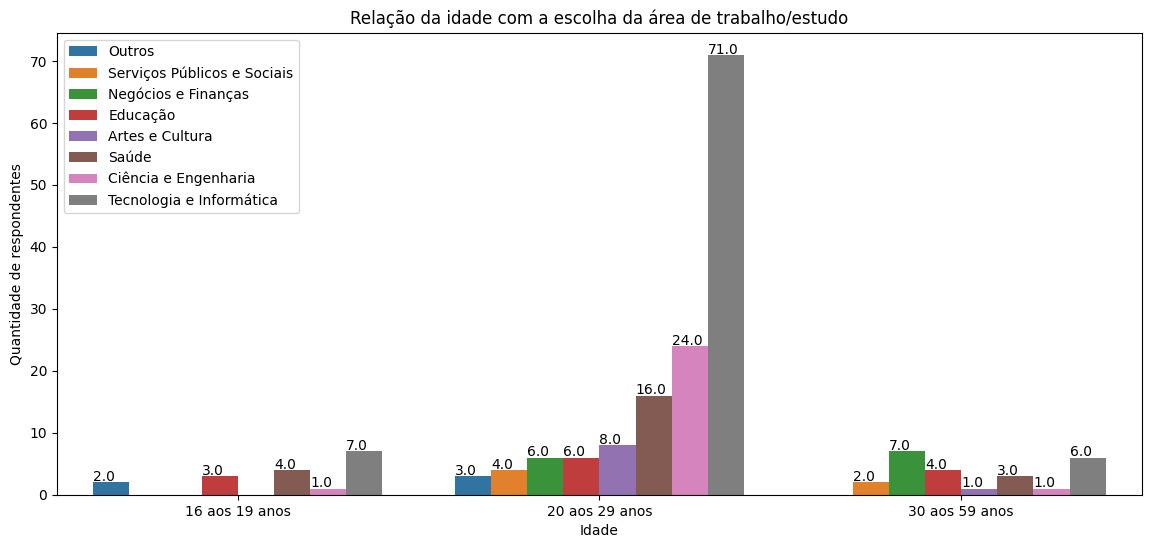

In [81]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='idade', y='len', hue='area', hue_order=hue_order, data=rel_idade_area)
ax.set(xlabel='Idade', ylabel='Quantidade de respondentes')
ax.set_title("Relação da idade com a escolha da área de trabalho/estudo")
plt.legend(loc='upper left')
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/rel_idade_area.png', bbox_inches='tight')
plt.show()

## Gênero relacionado a escolha da área de trabalho/estudo

In [82]:
df['genero'].unique()

array(['Masculino', 'Feminino', 'Não-binário', nan], dtype=object)

In [83]:
df.loc[df['genero'].isna() == True, ['genero']] = 'Outros'
df['genero'].unique()

array(['Masculino', 'Feminino', 'Não-binário', 'Outros'], dtype=object)

In [84]:
valores_col_genero = []
valores_col_area = []
for _, row in df.iterrows():
  for area in row['area'].split(','):
    valores_col_area.append(area.strip())
    valores_col_genero.append(row['genero'])

df5 = pd.DataFrame({'genero': valores_col_genero, 'area': valores_col_area})
df5.head()

,genero,area
0,Masculino,Tecnologia e Informática
1,Masculino,Tecnologia e Informática
2,Feminino,Serviços Públicos e Sociais
3,Feminino,Tecnologia e Informática
4,Feminino,Ciência e Engenharia


In [85]:
rel_genero_area = df5.groupby(['genero', 'area']).area.agg([len])
rel_genero_area = rel_genero_area.reset_index()
rel_genero_area.head()

,genero,area,len
0,Feminino,Artes e Cultura,3
1,Feminino,Ciência e Engenharia,9
2,Feminino,Educação,8
3,Feminino,Negócios e Finanças,6
4,Feminino,Outros,3


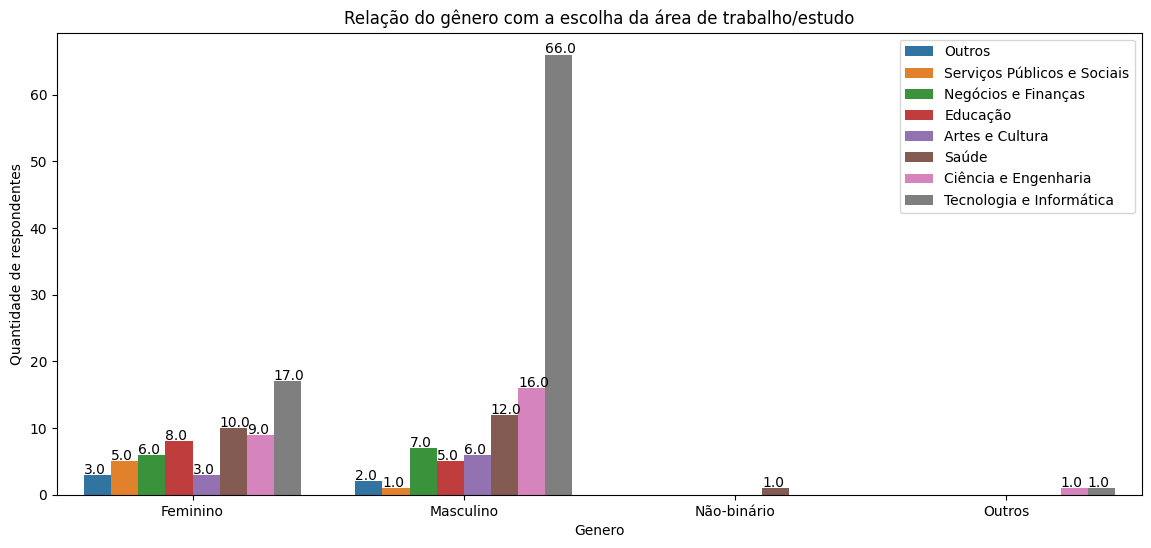

In [86]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='genero', y='len', hue='area', hue_order=hue_order, data=rel_genero_area)
ax.set(xlabel='Genero', ylabel='Quantidade de respondentes')
ax.set_title("Relação do gênero com a escolha da área de trabalho/estudo")
plt.legend(loc='upper right')
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/rel_genero_area.png', bbox_inches='tight')
plt.show()

##Nível de concordância sobre o grau de influência dos jogos na escolha da área de trabalho/estudo

In [87]:
df6 = df[['influencia']].value_counts().to_frame()
df6 = df6.reset_index()
df6 = df6.rename(columns={0: 'len'})
df6

,influencia,len
0,Concordo parcialmente,39
1,Discordo completamente,39
2,Neutro,27
3,Concordo completamente,24
4,Discordo parcialmente,22


In [88]:
df6.loc[df6['influencia'] == 'Discordo completamente', ['ordem']] = 0
df6.loc[df6['influencia'] == 'Discordo parcialmente', ['ordem']] = 1
df6.loc[df6['influencia'] == 'Neutro', ['ordem']] = 2
df6.loc[df6['influencia'] == 'Concordo parcialmente', ['ordem']] = 3
df6.loc[df6['influencia'] == 'Concordo completamente', ['ordem']] = 4
df6.sort_values(by='ordem', inplace = True)
df6.head()

,influencia,len,ordem
1,Discordo completamente,39,0.0
4,Discordo parcialmente,22,1.0
2,Neutro,27,2.0
0,Concordo parcialmente,39,3.0
3,Concordo completamente,24,4.0


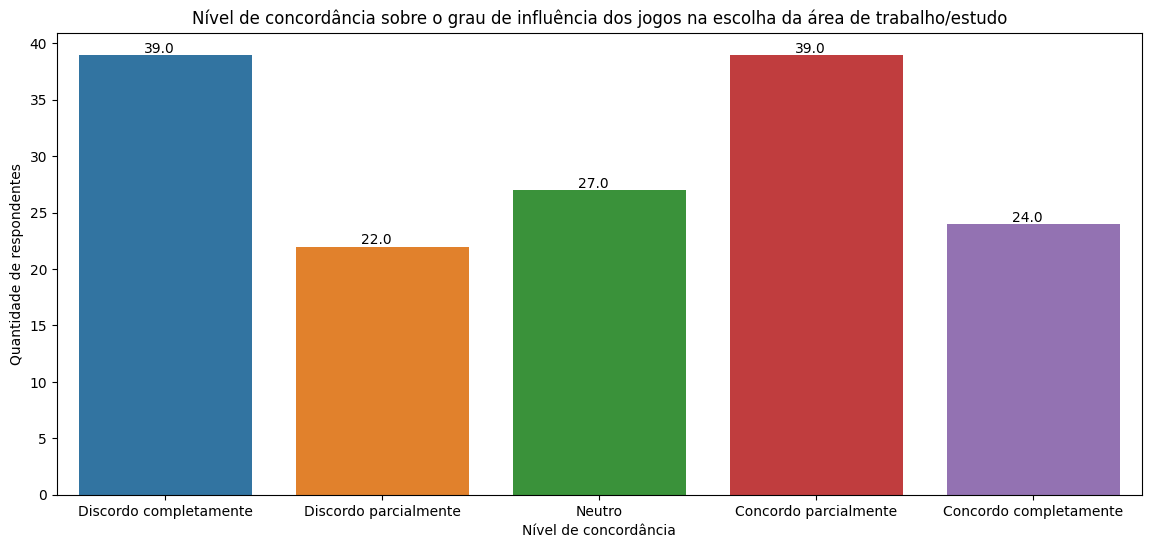

In [89]:
plt.figure(figsize=(14, 6))

ax = sns.barplot(x='influencia', y='len', data=df6)
ax.set(xlabel='Nível de concordância', ylabel='Quantidade de respondentes')
ax.set_title("Nível de concordância sobre o grau de influência dos jogos na escolha da área de trabalho/estudo")
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.30, p.get_height()+0.2))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/nivel_concordancia.png', bbox_inches='tight')
plt.show()

##Nível de influência relacionado a escolha da área de trabalho/estudo

In [90]:
valores_col_inf = []
valores_col_area = []
for _, row in df.iterrows():
  for area in row['area'].split(','):
    valores_col_area.append(area.strip())
    valores_col_inf.append(row['influencia'])

df7 = pd.DataFrame({'influencia': valores_col_inf, 'area': valores_col_area})
df7.head()

,influencia,area
0,Discordo parcialmente,Tecnologia e Informática
1,Concordo parcialmente,Tecnologia e Informática
2,Discordo completamente,Serviços Públicos e Sociais
3,Neutro,Tecnologia e Informática
4,Neutro,Ciência e Engenharia


In [91]:
rel_influencia_area = df7.groupby(['influencia', 'area']).area.agg([len])
rel_influencia_area = rel_influencia_area.reset_index()
rel_influencia_area.head()

,influencia,area,len
0,Concordo completamente,Artes e Cultura,2
1,Concordo completamente,Ciência e Engenharia,4
2,Concordo completamente,Outros,1
3,Concordo completamente,Serviços Públicos e Sociais,1
4,Concordo completamente,Tecnologia e Informática,20


In [92]:
rel_influencia_area.loc[rel_influencia_area['influencia'] == 'Discordo completamente', ['ordem']] = 0
rel_influencia_area.loc[rel_influencia_area['influencia'] == 'Discordo parcialmente', ['ordem']] = 1
rel_influencia_area.loc[rel_influencia_area['influencia'] == 'Neutro', ['ordem']] = 2
rel_influencia_area.loc[rel_influencia_area['influencia'] == 'Concordo parcialmente', ['ordem']] = 3
rel_influencia_area.loc[rel_influencia_area['influencia'] == 'Concordo completamente', ['ordem']] = 4
rel_influencia_area.sort_values(by='ordem', inplace = True)
rel_influencia_area.head()

,influencia,area,len,ordem
16,Discordo completamente,Negócios e Finanças,3,0.0
19,Discordo completamente,Serviços Públicos e Sociais,1,0.0
15,Discordo completamente,Educação,6,0.0
14,Discordo completamente,Ciência e Engenharia,8,0.0
13,Discordo completamente,Artes e Cultura,2,0.0


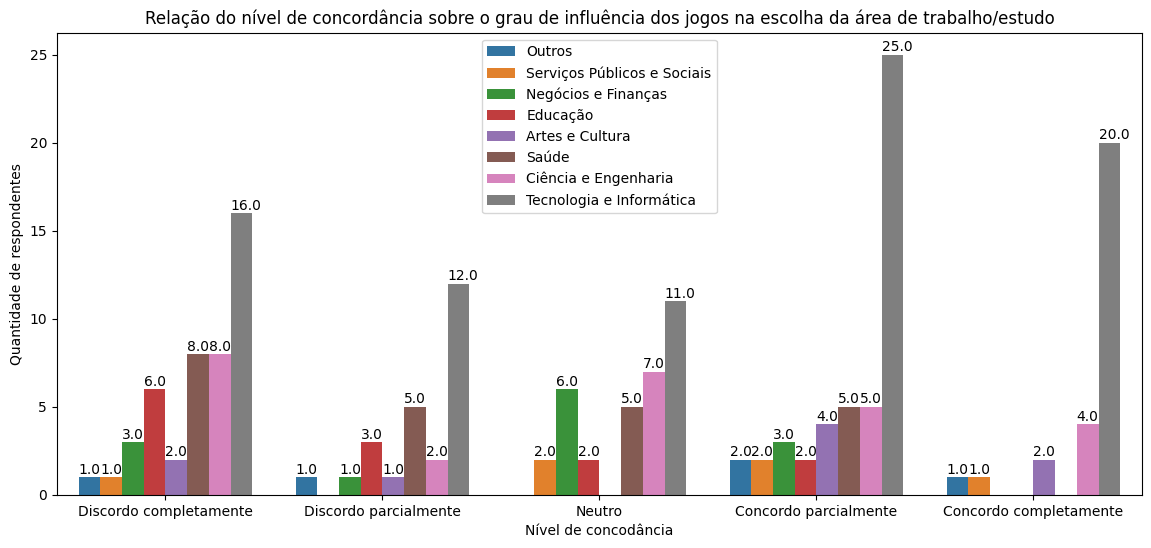

In [93]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='influencia', y='len', hue='area', hue_order=hue_order, data=rel_influencia_area)
ax.set(xlabel='Nível de concodância', ylabel='Quantidade de respondentes')
ax.set_title("Relação do nível de concordância sobre o grau de influência dos jogos na escolha da área de trabalho/estudo")
plt.legend(loc='upper center')
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+0.2))

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Base de dados/graficos/rel_inf_area.png', bbox_inches='tight')
plt.show()